**SARIMA** **MODEL**

**What is SARIMA?**\
Seasonal Autoregressive Integrated Moving Average, **SARIMA** or **Seasonal ARIMA**, is an extension of ARIMA that explicitly supports univariate time series data with a **seasonal component**.

**Modules required to implement SARIMA?**
>pip3 install numpy scipy patsy pandas<br>
>pip3 install statsmodels<br>
>pip install seaborn<br>
>pip install matplotlib<br>


In [21]:
import numpy as np #This is used to import numpy library
import pandas as pd #This is used to import pandas library

data_path = "/content/drive/MyDrive/Adrima Pred/AIML_CASE.xlsx" #Path for the file

#Use This Code if the file is CSV type
#df=pd.read_csv(data_path,parse_dates=True) 

#This is used to read EXCEL file
df=pd.read_excel(data_path,parse_dates=True) 

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to Date')

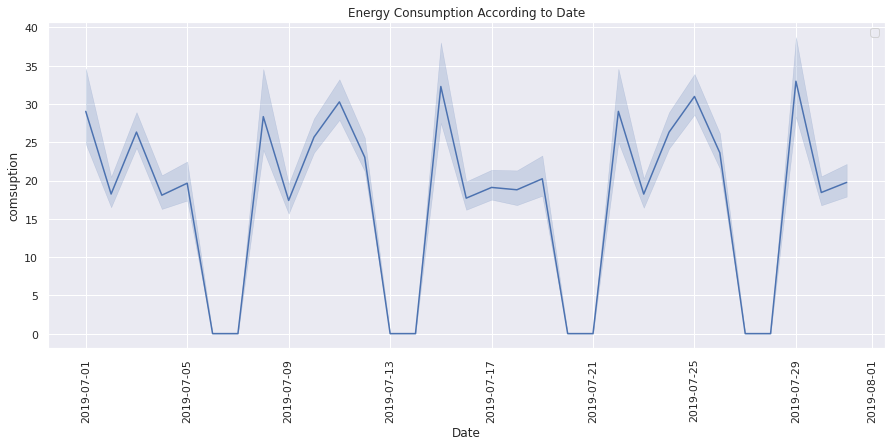

In [22]:
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
 
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
 
style.use('ggplot')
 
#ploting graph of Date vs Data
sns.lineplot(x=df["DATE"], y=df["DATA"], data=df)
sns.set(rc={'figure.figsize':(15,6)})
 
plt.title("CPU comsuption")
plt.xlabel("Date")
plt.ylabel("comsuption")
plt.grid(True)
plt.legend()
 
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)
 
 
plt.title("Energy Consumption According to Date")

**Data Imputation**

In [23]:
df.isna().sum() #This code return you the number of nan (null) values in the respective column

DATE     0
TIME     0
AM/PM    0
DATA     0
dtype: int64

In [24]:
df.dropna() #To Remove the nan(null) values in each columns row

,DATE,TIME,AM/PM,DATA
0,2019-07-01,12:00:00,AM,42.32
1,2019-07-01,12:15:00,AM,34.83
2,2019-07-01,12:30:00,AM,41.21
3,2019-07-01,12:45:00,AM,46.96
4,2019-07-01,01:00:00,AM,68.41
...,...,...,...,...
2971,2019-07-31,10:45:00,PM,17.94
2972,2019-07-31,11:00:00,PM,18.59
2973,2019-07-31,11:15:00,PM,17.60
2974,2019-07-31,11:30:00,PM,17.88


In [25]:
print('Shape of data',df.shape,"no. of (row,column)") # To get the no. of rows and columns (row,column)

Shape of data (2976, 4) no. of (row,column)


In [26]:
df.head() #This display the first 5 rows of the dataframe

,DATE,TIME,AM/PM,DATA
0,2019-07-01,12:00:00,AM,42.32
1,2019-07-01,12:15:00,AM,34.83
2,2019-07-01,12:30:00,AM,41.21
3,2019-07-01,12:45:00,AM,46.96
4,2019-07-01,01:00:00,AM,68.41


Since the time is in **12 hours** format<br>
***timeConversion*** function convert the **12hours** time into **24 hours** time by cheacking the **AM/PM** columns **data**

In [27]:
mod_df = df.copy() #copy the dataframe
cols_to_merge = mod_df.columns[:-1]

print("Merging columns:", cols_to_merge)
mod_df['DateAndTime'] = mod_df[cols_to_merge].apply(
    lambda x: pd.to_datetime(" ".join(x.astype(str))), axis=1
)


keep = ["DateAndTime", "DATA"]
to_remove_cols = [i for i in mod_df.columns if i not in keep]

print("\nRemoving columns", to_remove_cols, "\n")

mod_df.drop([*to_remove_cols], inplace=True, axis=1)

#mod_df.set_index("DateAndTime", inplace=True)  # converting datetimes to dataframe index

display(mod_df.head())  # display sameple of the modified data

Merging columns: Index(['DATE', 'TIME', 'AM/PM'], dtype='object')

Removing columns ['DATE', 'TIME', 'AM/PM'] 



,DATA,DateAndTime
0,42.32,2019-07-01 00:00:00
1,34.83,2019-07-01 00:15:00
2,41.21,2019-07-01 00:30:00
3,46.96,2019-07-01 00:45:00
4,68.41,2019-07-01 01:00:00


In [28]:
mod_df

,DATA,DateAndTime
0,42.32,2019-07-01 00:00:00
1,34.83,2019-07-01 00:15:00
2,41.21,2019-07-01 00:30:00
3,46.96,2019-07-01 00:45:00
4,68.41,2019-07-01 01:00:00
...,...,...
2971,17.94,2019-07-31 22:45:00
2972,18.59,2019-07-31 23:00:00
2973,17.60,2019-07-31 23:15:00
2974,17.88,2019-07-31 23:30:00


In [29]:
'''
!pip3 uninstall statsmodels
!pip3 install numpy scipy patsy pandas
!pip3 install statsmodels
'''

'\n!pip3 uninstall statsmodels\n!pip3 install numpy scipy patsy pandas\n!pip3 install statsmodels\n'

**Generating next month date and time**

In [30]:
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# This Code generate next month date with time (15 min diff)
nextMonth = []
st = pd.Timedelta(minutes=0)
m = mod_df["DateAndTime"].iloc[-1]
for i in range (2976):
     st = m +pd.Timedelta(minutes=15)
     m = st
     nextMonth.append(st)

nextDf = pd.DataFrame(nextMonth,columns=["DateAndTime"])
nextMonthForcast = nextDf.copy()
nextMonthForcast["DATA"] = 0

In [31]:
nextMonthForcast #next month date and time

,DateAndTime,DATA
0,2019-08-01 00:00:00,0
1,2019-08-01 00:15:00,0
2,2019-08-01 00:30:00,0
3,2019-08-01 00:45:00,0
4,2019-08-01 01:00:00,0
...,...,...
2971,2019-08-31 22:45:00,0
2972,2019-08-31 23:00:00,0
2973,2019-08-31 23:15:00,0
2974,2019-08-31 23:30:00,0


In [32]:
conDf = pd.concat([mod_df,nextMonthForcast]) # join main dataframe with next month dataframe
trainEndDf = conDf["DATA"].iloc[:len(df)]
nextMonthForcast = nextDf.set_index("DateAndTime")
mod_df = mod_df.set_index("DateAndTime")

In [33]:
conDf = conDf.reset_index()
conDf.drop('index', inplace=True, axis=1)

In [34]:
conDf

,DATA,DateAndTime
0,42.32,2019-07-01 00:00:00
1,34.83,2019-07-01 00:15:00
2,41.21,2019-07-01 00:30:00
3,46.96,2019-07-01 00:45:00
4,68.41,2019-07-01 01:00:00
...,...,...
5947,0.00,2019-08-31 22:45:00
5948,0.00,2019-08-31 23:00:00
5949,0.00,2019-08-31 23:15:00
5950,0.00,2019-08-31 23:30:00


In [35]:
#Ho: It is non stationary
#H1: It is stationary
from statsmodels.tsa.stattools import adfuller

#P-value determain wheather the data is stationary or not
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(mod_df["DATA"])

ADF Test Statistic : -3.3357581915230283
p-value : 0.01335380979827655
#Lags Used : 29
Number of Observations Used : 2946
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Here P-value is 0.01 which is less than 0.05, which means data is not accepting the null hypothesis, which means data is stationary.

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Mits Consumption According to Date')

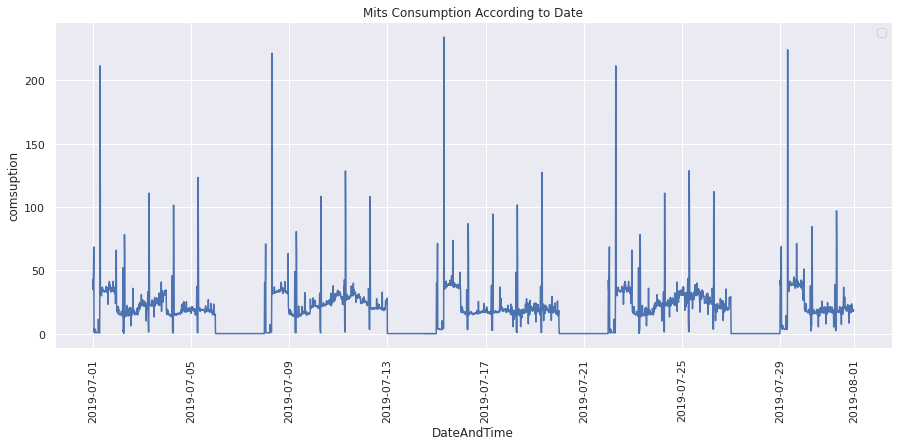

In [36]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
 
style.use('ggplot')
 
#Graph of DateAndTime vs Data 
sns.lineplot(x=mod_df.index, y=mod_df["DATA"], data=df)
sns.set(rc={'figure.figsize':(15,6)}) #setting the graph size
 
plt.title("CPU comsuption")
plt.xlabel("DateAndTime")
plt.ylabel("comsuption")
plt.grid(True)
plt.legend()
 
#Roate the Date to 90 degree
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)
 
#Title of graph
plt.title("Mits Consumption According to Date")

In [37]:
total = len(mod_df) #total no. of train and prediction dataset
mod_conDf = conDf.set_index("DateAndTime")

In [38]:
train_set = mod_conDf.iloc[:total,:]

In [40]:
train_set.tail() #last 5 values

,DATA
DateAndTime,
2019-07-31 22:45:00,17.94
2019-07-31 23:00:00,18.59
2019-07-31 23:15:00,17.60
2019-07-31 23:30:00,17.88
2019-07-31 23:45:00,18.96


**Applying SARIMA mode to train the data for the next month prediction**

In [41]:
#import SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
 
 
#SARIMA
my_order = (1,1,3)
my_seasonal_order = (1,1,1,12)
 
model = SARIMAX(train_set,order=my_order,seasonal_order=my_seasonal_order)
result = model.fit()

In [42]:
train_set

,DATA
DateAndTime,
2019-07-01 00:00:00,42.32
2019-07-01 00:15:00,34.83
2019-07-01 00:30:00,41.21
2019-07-01 00:45:00,46.96
2019-07-01 01:00:00,68.41
...,...
2019-07-31 22:45:00,17.94
2019-07-31 23:00:00,18.59
2019-07-31 23:15:00,17.60


In [43]:
pred=result.predict(typ='levels') # model predict for test dataset

In [44]:
actual_set = mod_conDf.iloc[:total,:]

In [45]:
expected = np.array(actual_set) 
predictions = np.array(pred)

In [46]:
# RMS ERROR (ROOT MEAN SQUARE ERROR)
# This is used to stydy the model quality
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(expected , predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 13.170159


In [47]:
nextPred=result.predict(start=total+1,end=total*2,typ='levels') # model predict for test dataset
nextPred

2977    16.477984
2978    16.904743
2979    16.692141
2980    26.705213
2981    25.375183
          ...    
5948    15.863813
5949    14.944731
5950    16.370390
5951    15.276287
5952    15.317572
Length: 2976, dtype: float64

In [48]:
def check_weekday(pred,date):
    # computing the parameter date
    # with len function
    res=len(pd.bdate_range(date,date))
      
    if res == 0 :
      return 1
    else:
      return pred

In [49]:
dataframe = pd.DataFrame()
dataframe["DateAndTime"] = mod_conDf.index[total:total*2] #prediction date and time
dataframe["predicted_data"] = nextPred.values #predicted data

#setting the weekend to zero
dataframe["predicted_data"] = dataframe.apply(lambda pred:  0 if check_weekday(pred["predicted_data"],pred["DateAndTime"]) == 1 else pred["predicted_data"] ,axis=1)
dataframe = dataframe.set_index("DateAndTime")

In [50]:
dataframe

,predicted_data
DateAndTime,
2019-08-01 00:00:00,16.477984
2019-08-01 00:15:00,16.904743
2019-08-01 00:30:00,16.692141
2019-08-01 00:45:00,26.705213
2019-08-01 01:00:00,25.375183
...,...
2019-08-31 22:45:00,0.000000
2019-08-31 23:00:00,0.000000
2019-08-31 23:15:00,0.000000


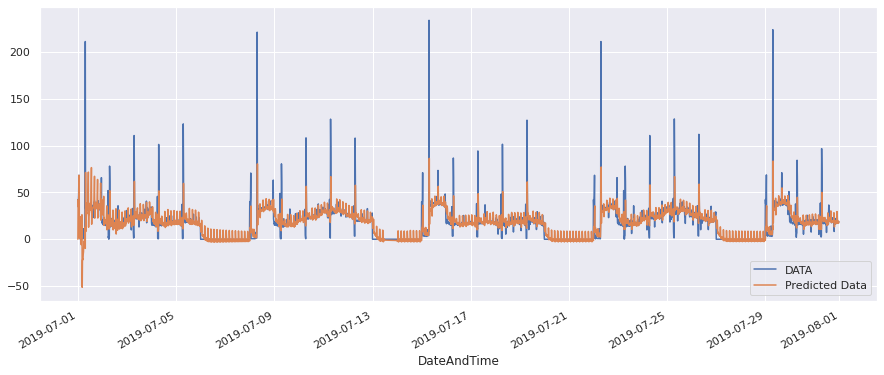

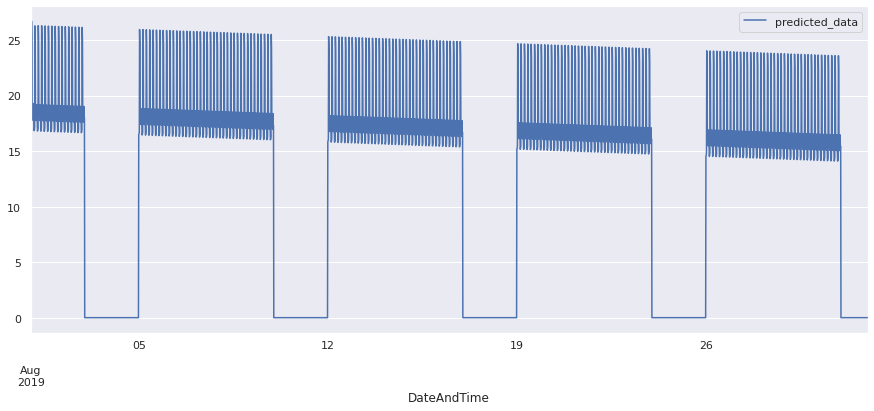

In [51]:
# Testing Graph= Comparision between Actual Data & Predicted data
import matplotlib.pyplot as plt #importing module for displaying graph
# graph of actual (actual valuw) value vs predicted value
actual_set.plot(legend=True,label="Actual Data")
pred.plot(legend=True,label="Predicted Data")

#Prediction for next month
dataframe.plot(legend=True,label="Next Predicted Data")

In [52]:
actual_set

,DATA
DateAndTime,
2019-07-01 00:00:00,42.32
2019-07-01 00:15:00,34.83
2019-07-01 00:30:00,41.21
2019-07-01 00:45:00,46.96
2019-07-01 01:00:00,68.41
...,...
2019-07-31 22:45:00,17.94
2019-07-31 23:00:00,18.59
2019-07-31 23:15:00,17.60


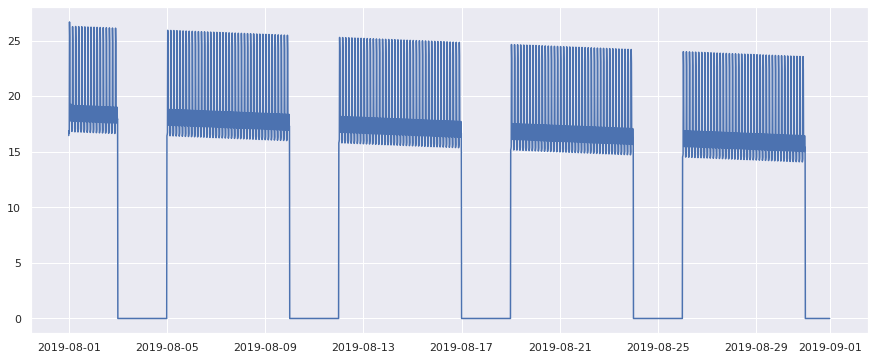

In [65]:
# predictd data for next month
plt.plot(dataframe)

In [55]:
predicted_file_name = "prediction.csv" # final file name
dataframe.to_csv(predicted_file_name) # to save the predicted  data into CSV

**----------------END-------------------**